In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies_df = pd.read_csv(r'C:\Users\Asus\Downloads\IMDB movies.csv', 
                        index_col = 'imdb_title_id')
movies_df.head()

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019,NaN,NaN,NaN,NaN,28.0,14.0
tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438,NaN,NaN,NaN,NaN,12.0,5.0


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81273 entries, tt0000574 to tt9914286
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  81273 non-null  object 
 1   original_title         81273 non-null  object 
 2   year                   81273 non-null  int64  
 3   date_published         81273 non-null  object 
 4   genre                  81273 non-null  object 
 5   duration               81273 non-null  int64  
 6   country                81234 non-null  object 
 7   language               80518 non-null  object 
 8   director               81200 non-null  object 
 9   writer                 79780 non-null  object 
 10  production_company     76948 non-null  object 
 11  actors                 81207 non-null  object 
 12  description            78843 non-null  object 
 13  avg_vote               81273 non-null  float64
 14  votes                  81273 non-null  int64  


In [4]:
movies_df.shape

(81273, 21)

In [5]:
director = movies_df['director'].str.split(',', n = 1, expand = True)
director = director.rename(columns = {0 : 'director_1', 1 : 'director_2'})

actors = movies_df['actors'].str.split(',', n = 15, expand = True)
cols = actors.columns.tolist()
cols = [x+1 for x in cols]
actors.columns = cols
actors = actors.add_prefix('actor_')

language = movies_df['language'].str.split(',', expand=True)
language = language.rename(columns = {0:'language_1'})

country = movies_df['country'].str.split(',', expand=True)
country = country.rename(columns = {0:'country_1'})

In [6]:
concat_data = [movies_df, country[['country_1']], language[['language_1']], director[['director_1']], actors[['actor_1']]]
movies_df = pd.concat(concat_data, axis=1)
movies_df.head()

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,country_1,language_1,director_1,actor_1
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,...,$ 2250,NaN,NaN,NaN,7.0,7.0,Australia,NaN,Charles Tait,Elizabeth Tait
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,NaN,NaN,NaN,NaN,4.0,2.0,Germany,NaN,Urban Gad,Asta Nielsen
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,$ 45000,NaN,NaN,NaN,24.0,3.0,USA,English,Charles L. Gaskill,Helen Gardner
tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,...,NaN,NaN,NaN,NaN,28.0,14.0,Italy,Italian,Francesco Bertolini,Salvatore Papa
tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,NaN,NaN,NaN,NaN,12.0,5.0,USA,English,Sidney Olcott,R. Henderson Bland


In [7]:
movies_df.isnull().sum(axis=0)

title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     39
language                   755
director                    73
writer                    1493
production_company        4325
actors                      66
description               2430
avg_vote                     0
votes                        0
budget                   58469
usa_gross_income         66179
worlwide_gross_income    51381
metascore                68551
reviews_from_users        7077
reviews_from_critics     10987
country_1                   39
language_1                 755
director_1                  73
actor_1                     66
dtype: int64

<AxesSubplot:ylabel='imdb_title_id'>

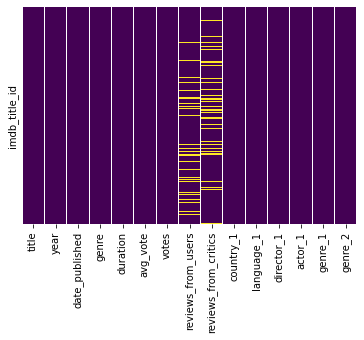

In [36]:
sns.heatmap(movies_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
movies_df.isnull().sum(axis=1).sort_values(ascending=False)

imdb_title_id
tt4045478     16
tt4045476     16
tt6889806     16
tt4399812     14
tt10764458    13
              ..
tt0091225      0
tt0091223      0
tt0109707      0
tt0091217      0
tt0839980      0
Length: 81273, dtype: int64

In [9]:
movies_df.isnull().sum(axis=0).sort_values(ascending=False)/len(movies_df) * 100

metascore                84.346585
usa_gross_income         81.428027
budget                   71.941481
worlwide_gross_income    63.220258
reviews_from_critics     13.518635
reviews_from_users        8.707689
production_company        5.321571
description               2.989923
writer                    1.837018
language_1                0.928968
language                  0.928968
director                  0.089821
director_1                0.089821
actor_1                   0.081208
actors                    0.081208
country_1                 0.047986
country                   0.047986
avg_vote                  0.000000
votes                     0.000000
duration                  0.000000
genre                     0.000000
date_published            0.000000
year                      0.000000
original_title            0.000000
title                     0.000000
dtype: float64

In [10]:
movies_df = movies_df.drop(['metascore',
                            'usa_gross_income',
                            'budget',
                            'worlwide_gross_income',
                            'production_company',
                            'description',
                            'language',
                            'country',
                            'director',
                            'writer',
                            'actors',
                            'original_title'], axis=1)
movies_df.head()

,title,year,date_published,genre,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,country_1,language_1,director_1,actor_1
imdb_title_id,,,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,6.1,537,7.0,7.0,Australia,NaN,Charles Tait,Elizabeth Tait
tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,5.9,171,4.0,2.0,Germany,NaN,Urban Gad,Asta Nielsen
tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,5.2,420,24.0,3.0,USA,English,Charles L. Gaskill,Helen Gardner
tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,7.0,2019,28.0,14.0,Italy,Italian,Francesco Bertolini,Salvatore Papa
tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,5.7,438,12.0,5.0,USA,English,Sidney Olcott,R. Henderson Bland


In [11]:
(movies_df.isnull().sum(axis=1).sort_values(ascending=False) > 5).sum()

3

In [12]:
movies_df = movies_df[movies_df.isnull().sum(axis=1).sort_values(ascending=False) <= 5]
movies_df

C:\Users\Asus\miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,year,date_published,genre,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,country_1,language_1,director_1,actor_1
imdb_title_id,,,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,6.1,537,7.0,7.0,Australia,NaN,Charles Tait,Elizabeth Tait
tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,5.9,171,4.0,2.0,Germany,NaN,Urban Gad,Asta Nielsen
tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,5.2,420,24.0,3.0,USA,English,Charles L. Gaskill,Helen Gardner
tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,7.0,2019,28.0,14.0,Italy,Italian,Francesco Bertolini,Salvatore Papa
tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,5.7,438,12.0,5.0,USA,English,Sidney Olcott,R. Henderson Bland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9903716,Jessie,2019,2019-03-15,"Horror, Thriller",106,7.2,219,21.0,NaN,India,Telugu,Aswani Kumar V.,Sritha Chandana
tt9905412,Ottam,2019,2019-03-08,Drama,120,7.8,510,NaN,NaN,India,Malayalam,Zam,Nandu Anand
tt9905462,Pengalila,2019,2019-03-08,Drama,111,8.4,604,NaN,NaN,India,Malayalam,T.V. Chandran,Lal


In [13]:
movies_df.drop_duplicates(keep='first',inplace=True)

In [14]:
round(movies_df.isnull().sum().sort_values(ascending=False)/len(movies_df)*100,2)

reviews_from_critics    13.52
reviews_from_users       8.70
language_1               0.93
director_1               0.09
actor_1                  0.08
country_1                0.04
votes                    0.00
avg_vote                 0.00
duration                 0.00
genre                    0.00
date_published           0.00
year                     0.00
title                    0.00
dtype: float64

In [15]:
movies_df.groupby('language_1').language_1.count().sort_values(ascending=False)

language_1
English       41036
French         5184
Spanish        3197
Italian        3071
Japanese       2941
              ...  
Tarahumara        1
Samoan            1
Cree              1
Pular             1
Tatar             1
Name: language_1, Length: 160, dtype: int64

In [16]:
movies_df.language_1.describe()

count       80518
unique        160
top       English
freq        41036
Name: language_1, dtype: object

In [17]:
movies_df.country_1.describe()

count     81234
unique      157
top         USA
freq      29712
Name: country_1, dtype: object

In [18]:
movies_df.language_1 = movies_df.language_1.fillna('English')
movies_df.country_1 = movies_df.country_1.fillna('English')

In [19]:
round(movies_df.isnull().sum().sort_values(ascending=False)/len(movies_df)*100,2)

reviews_from_critics    13.52
reviews_from_users       8.70
director_1               0.09
actor_1                  0.08
language_1               0.00
country_1                0.00
votes                    0.00
avg_vote                 0.00
duration                 0.00
genre                    0.00
date_published           0.00
year                     0.00
title                    0.00
dtype: float64

In [20]:
movies_df.describe().round(2)

,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics
count,81270.00,81270.00,81270.00,81270.00,74196.00,70286.00
mean,1993.01,100.56,5.93,9422.10,43.75,27.99
std,23.99,25.32,1.24,52203.38,159.90,58.71
min,1906.00,40.00,1.00,99.00,1.00,1.00
25%,1979.00,88.00,5.20,206.00,4.00,3.00
50%,2002.00,96.00,6.10,495.00,9.00,8.00
75%,2012.00,108.00,6.80,1865.75,26.00,24.00
max,2019.00,3360.00,10.00,2159628.00,8302.00,987.00


In [21]:
movies_df.corr()

,year,duration,avg_vote,votes,reviews_from_users,reviews_from_critics
year,1.000000,0.150123,-0.213901,0.061416,0.068079,0.145183
duration,0.150123,1.000000,0.221669,0.111351,0.117187,0.132651
avg_vote,-0.213901,0.221669,1.000000,0.164853,0.142879,0.198265
votes,0.061416,0.111351,0.164853,1.000000,0.792243,0.674826
reviews_from_users,0.068079,0.117187,0.142879,0.792243,1.000000,0.697933
reviews_from_critics,0.145183,0.132651,0.198265,0.674826,0.697933,1.000000


<AxesSubplot:>

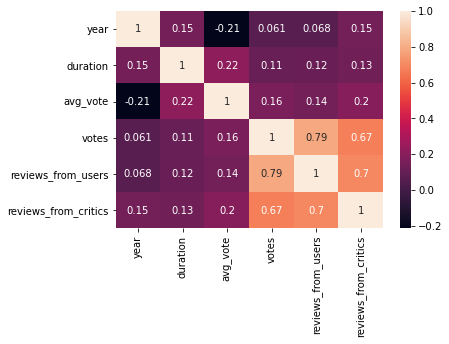

In [22]:
corr_val = movies_df.corr()
sns.heatmap(corr_val, annot=True)

In [23]:
#top 10 highest vote movie
top_10 = movies_df.sort_values(by='votes', ascending=False)[:10]
top_10

,title,year,date_published,genre,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,country_1,language_1,director_1,actor_1
imdb_title_id,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,1995-03-03,Drama,142,9.3,2159628,7029.0,224.0,USA,English,Frank Darabont,Tim Robbins
tt0468569,The Dark Knight,2008,2008-07-24,"Action, Crime, Drama",152,9.0,2134569,6344.0,418.0,USA,English,Christopher Nolan,Christian Bale
tt1375666,Inception,2010,2010-07-16,"Action, Adventure, Sci-Fi",148,8.8,1892929,3439.0,462.0,USA,English,Christopher Nolan,Leonardo DiCaprio
tt0137523,Fight Club,1999,1999-11-12,Drama,139,8.8,1725365,3496.0,365.0,USA,English,David Fincher,Edward Norton
tt0110912,Pulp Fiction,1994,1994-10-28,"Crime, Drama",154,8.9,1695085,2766.0,278.0,USA,English,Quentin Tarantino,Tim Roth
tt0109830,Forrest Gump,1994,1994-10-07,"Drama, Romance",142,8.8,1662528,2050.0,163.0,USA,English,Robert Zemeckis,Tom Hanks
tt0133093,The Matrix,1999,1999-06-11,"Action, Sci-Fi",136,8.7,1554261,4069.0,337.0,USA,English,Lana Wachowski,Keanu Reeves
tt0120737,The Lord of the Rings: The Fellowship of the Ring,2001,2001-12-19,"Adventure, Drama, Fantasy",178,8.8,1548863,5218.0,329.0,New Zealand,English,Peter Jackson,Alan Howard
tt0167260,The Lord of the Rings: The Return of the King,2003,2003-12-17,"Adventure, Drama, Fantasy",201,8.9,1533574,3528.0,346.0,New Zealand,English,Peter Jackson,Noel Appleby


In [24]:
TempGenre = movies_df.genre.str.split(',',expand=True).iloc[:,0:2]
TempGenre.columns=['genre_1','genre_2']
TempGenre.genre_2.fillna(TempGenre.genre_1,inplace=True)
TempGenre

,genre_1,genre_2
imdb_title_id,,
tt0000574,Biography,Crime
tt0001892,Drama,Drama
tt0002101,Drama,History
tt0002130,Adventure,Drama
tt0002199,Biography,Drama
...,...,...
tt9903716,Horror,Thriller
tt9905412,Drama,Drama
tt9905462,Drama,Drama


In [25]:
movies_df = pd.concat([movies_df,TempGenre],axis=1)
movies_df

,title,year,date_published,genre,duration,avg_vote,votes,reviews_from_users,reviews_from_critics,country_1,language_1,director_1,actor_1,genre_1,genre_2
imdb_title_id,,,,,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,6.1,537,7.0,7.0,Australia,English,Charles Tait,Elizabeth Tait,Biography,Crime
tt0001892,Den sorte drøm,1911,1911-08-19,Drama,53,5.9,171,4.0,2.0,Germany,English,Urban Gad,Asta Nielsen,Drama,Drama
tt0002101,Cleopatra,1912,1912-11-13,"Drama, History",100,5.2,420,24.0,3.0,USA,English,Charles L. Gaskill,Helen Gardner,Drama,History
tt0002130,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,7.0,2019,28.0,14.0,Italy,Italian,Francesco Bertolini,Salvatore Papa,Adventure,Drama
tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,5.7,438,12.0,5.0,USA,English,Sidney Olcott,R. Henderson Bland,Biography,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9903716,Jessie,2019,2019-03-15,"Horror, Thriller",106,7.2,219,21.0,NaN,India,Telugu,Aswani Kumar V.,Sritha Chandana,Horror,Thriller
tt9905412,Ottam,2019,2019-03-08,Drama,120,7.8,510,NaN,NaN,India,Malayalam,Zam,Nandu Anand,Drama,Drama
tt9905462,Pengalila,2019,2019-03-08,Drama,111,8.4,604,NaN,NaN,India,Malayalam,T.V. Chandran,Lal,Drama,Drama


In [26]:
#Top 5 genre with the highest vote
top_5_genre = movies_df.groupby(['genre_1','genre_2']).votes.mean().sort_values(ascending=False).round(2).head(5)
top_5_genre

genre_1    genre_2   
Action      Mystery      54121.01
            Adventure    45356.02
Biography   Crime        43614.24
Animation   Adventure    40134.49
Action      Sci-Fi       38548.77
Name: votes, dtype: float64

In [34]:
#top 5 directors with the highest vote
g_director = movies_df.pivot_table(index=['director_1'], values='votes', aggfunc='mean').sort_values(by = 'votes', ascending=False).round(2).head()
g_director

,votes
director_1,
Christopher Nolan,1099589.10
Frank Darabont,881555.50
Pete Docter,728671.67
David Fincher,659558.50
Quentin Tarantino,647912.00


<AxesSubplot:xlabel='director_1'>

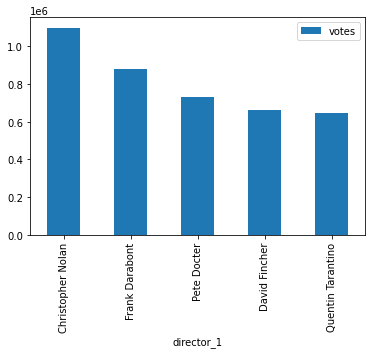

In [35]:
g_director.plot.bar()

In [28]:
movies_df.groupby(['actor_1']).reviews_from_users.sum().sort_values(ascending=False).round(2).head(10)

actor_1
Johnny Depp          22510.0
Robert Downey Jr.    21360.0
Christian Bale       21251.0
Leonardo DiCaprio    21086.0
Tom Cruise           20582.0
Tom Hanks            19660.0
Bruce Willis         15491.0
Hugh Jackman         15042.0
Nicolas Cage         15014.0
Keanu Reeves         14777.0
Name: reviews_from_users, dtype: float64

In [29]:
jd = movies_df[movies_df['actor_1'] == 'Johnny Depp']
tc = movies_df[movies_df['actor_1'] == 'Tom Cruise']
ld = movies_df[movies_df['actor_1'] == 'Leonardo DiCaprio']

In [30]:
compare = jd.append([tc, ld])
compare.actor_1.unique()

array(['Johnny Depp', 'Tom Cruise', 'Leonardo DiCaprio'], dtype=object)

In [31]:
compare.groupby('actor_1')[['reviews_from_users','reviews_from_critics']].mean()

,reviews_from_users,reviews_from_critics
actor_1,,
Johnny Depp,562.750000,225.975000
Leonardo DiCaprio,1171.444444,295.833333
Tom Cruise,663.935484,247.451613


<AxesSubplot:xlabel='actor_1'>

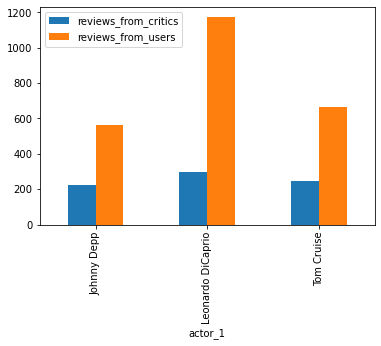

In [32]:
#graph to compare 3 actors on their reviews from users and critics
pv = compare.pivot_table(index=['actor_1'], values=['reviews_from_users','reviews_from_critics'], aggfunc='mean')
pv.plot.bar()